# An√°lisis predictivo del consumo el√©ctrico en la ciudad de Barcelona

El principal objetivo es limpiar los datos generados por parte de el hist√≥rico de generaci√≥n energ√©tica de la ciudad de Barcelona y hacer una predicci√≥n de la demanda energ√©tica en un per√≠do de tiempo especificado.

## 1. Preparaci√≥n de los datos

Lo primero que debemos hacer es importar y cargar las librer√≠as que utilizaremos en el ejercicio.

*    [pandas](https://pandas.pydata.org/) es una librer√≠a de Python especializada en el manejo y an√°lisis de estructuras de datos.
*    [matplotlib](https://matplotlib.org/) es una librer√≠a de Python especializada en la creaci√≥n de visualizaciones
*    [seaborn](https://seaborn.pydata.org/) es una librer√≠a de Python basada en matplotlib especializada en la creaci√≥n de visualizaciones.
*    [git](https://gitpython.readthedocs.io/en/stable/) es una librer√≠a de Python que permite interactuar con el sistema de control de versiones Github.
*    [xgboost](https://xgboost.readthedocs.io/en/stable/) es una librer√≠a de Python para la implementaci√≥n de algoritmos de machine learning en el marco de "Gradient Boosting"
*    [shutil](https://docs.python.org/es/3.13/library/shutil.html) ofrece varias operaciones de alto nivel en archivos y colecciones de archivos. 

*    [git](https://gitpython.readthedocs.io/en/stable/) Ofrece librer√≠as que premiten interactuar con repositorios de github.
*    [os](https://docs.python.org/es/3.10/library/os.html) provee una manera vers√°til de usar funcionalidades dependientes del sistema operativo.
*    [warnings](https://docs.python.org/3/library/warnings.html) permite ignorar mensajes de alerta de versiones en desuso.


In [5]:
# Instalaci√≥n de librer√≠as necesarias
!pip install gitpython
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install xgboost
!pip install git
!pip install sklearn 
!pip install scikit-learn

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  √ó Getting requirements to build wheel did not run successfully.
  ‚îÇ exit code: 1
  ‚ï∞‚îÄ> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/s

In [6]:
# Importaci√≥n de librer√≠as
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import git
import warnings
import os
import shutil
import sklearn
import stat
warnings.filterwarnings('ignore')

## 1.5 Recogida de campos necesarios

Una vez instaladas e importadas las librer√≠as que utilizaremos, cargamos los conjuntos de datos originales. Estos conjuntos de datos son publicados por el Ayuntamiento de Barcelona: [en la siguiente p√°gina](https://opendata-ajuntament.barcelona.cat/data/es/dataset/consum-electricitat-bcn)

In [7]:
# def sumar_consumo_por_dia_horario(csv_path):
#     # Leer el CSV con las columnas necesarias
#     df = pd.read_csv(csv_path, usecols=['id', 'data', 'tramo horario', 'valor', 'sector_economic'])
    
#     # Convertir 'data' a datetime
#     df['data'] = pd.to_datetime(df['data'])
    
#     # Extraer solo la fecha (sin la hora)
#     df['fecha'] = df['data'].dt.date
    
#     # Agrupar por fecha, sector econ√≥mico y tramo horario, sumando 'valor'
#     suma_agrupada = df.groupby(['fecha', 'sector_economic', 'tramo horario'])['valor'].sum().reset_index()
    
#     return suma_agrupada

# if __name__ == "__main__":
#     a√±os = list(range(2019, 2026))
    
#     for a√±o in a√±os:
#         ruta_csv = input(f"Por favor, introduce la ruta del archivo CSV para el a√±o {a√±o}: ")
#         resultado = sumar_consumo_por_dia_horario(ruta_csv)
        
#         nombre_salida = f"{a√±o}_consum_electricitat_bcn.csv"
#         resultado.to_csv(nombre_salida, index=False)
        
#         print(f"Datos procesados para el a√±o {a√±o} guardados en {nombre_salida}")



Una vez limpios los datos, y subidos a git, trabajamos con ellos y los normalizamos

In [8]:
def on_rm_error(func, path, exc_info):
    # Cambia el permiso y reintenta
    print(f"Permiso denegado en: {path}. Cambiando permisos y reintentando...")
    os.chmod(path, stat.S_IWRITE)
    func(path)

repo_path = "IaBigData"

if os.path.exists(repo_path):
    try:
        print(f"Eliminando carpeta existente: {repo_path}")
        shutil.rmtree(repo_path, onerror=on_rm_error)
        print("Carpeta eliminada correctamente.")
    except Exception as e:
        raise RuntimeError(f"No se pudo eliminar la carpeta {repo_path}: {e}")


Eliminando carpeta existente: IaBigData
Permiso denegado en: IaBigData\.git\objects\pack\pack-71c79ca1371dfaf898e4d03d2bc7a6f5b5b5382e.idx. Cambiando permisos y reintentando...
Permiso denegado en: IaBigData\.git\objects\pack\pack-71c79ca1371dfaf898e4d03d2bc7a6f5b5b5382e.pack. Cambiando permisos y reintentando...
Permiso denegado en: IaBigData\.git\objects\pack\pack-71c79ca1371dfaf898e4d03d2bc7a6f5b5b5382e.rev. Cambiando permisos y reintentando...
Carpeta eliminada correctamente.


In [9]:
# Ruta donde se va a clonar el repositorio
repo_path = "IaBigData"

# Si ya existe la carpeta, la eliminamos para sobrescribirla
if os.path.exists(repo_path):
    print(f"Eliminando carpeta existente: {repo_path}")
    shutil.rmtree(repo_path)

# Clonamos el repositorio de Github con manejo de errores
try:
    print("Clonando el repositorio...")
    git.Repo.clone_from("https://github.com/AdrianYArmas/IaBigData.git", repo_path)
    print("Repositorio clonado correctamente.")
except Exception as e:
    raise RuntimeError(f"Error al clonar el repositorio: {e}")

# Ruta a la subcarpeta deseada
subfolder_path = os.path.join(repo_path, "TFG-MAED-Bcn", "dataset")

# Validar existencia de la subcarpeta
if not os.path.exists(subfolder_path):
    raise FileNotFoundError(f"La subcarpeta no existe: {subfolder_path}")

# Funci√≥n para importar, agrupar y adaptar los datos
def primera(x):
    file_path = os.path.join(subfolder_path, f"{x}_consum_electricitat_bcn.csv")

    if not os.path.isfile(file_path):
        raise FileNotFoundError(f"No se encontr√≥ el archivo: {file_path}")

    try:
        data = pd.read_csv(file_path)
    except Exception as e:
        raise RuntimeError(f"Error al leer el archivo CSV: {e}")

    if 'Sector_Economic' not in data.columns or 'Data' not in data.columns or 'Valor' not in data.columns:
        raise ValueError("El archivo CSV no contiene las columnas necesarias: 'Sector_Economic', 'Data', 'Valor'")

    data_agrupado = data.groupby(['Sector_Economic', 'Data'])['Valor'].sum().reset_index()
    data_agrupado['Data'] = pd.to_datetime(data_agrupado['Data'], errors='coerce')

    if data_agrupado['Data'].isnull().any():
        raise ValueError("Se encontraron fechas inv√°lidas en la columna 'Data'.")

    return data_agrupado

Clonando el repositorio...
Repositorio clonado correctamente.


Ahora comprobamos si cumplen con la estructura de datos mostrando las primeras columnas de cada .csv

In [10]:
# Llamado a la funci√≥n para generar las tablas
data_2019 = primera(2019)
data_2020 = primera(2020)
data_2021 = primera(2021)
data_2022 = primera(2022)
data_2023 = primera(2023)
data_2024 = primera(2024)
data_2025 = primera(2025)

# Imprimimos las primeras filas de 2025
print("\ndata_2019")
print(data_2019.head())
print("\ndata_2020")
print(data_2020.head())
print("\ndata_2021")
print(data_2022.head())
print("\ndata_2022")
print(data_2022.head())
print("\ndata_2023")
print(data_2023.head())
print("\ndata_2024")
print(data_2024.head())
print("\ndata_2025")
print(data_2025.head())


data_2019
  Sector_Economic       Data    Valor
0       Ind√∫stria 2019-01-01  1000881
1       Ind√∫stria 2019-01-02  1702091
2       Ind√∫stria 2019-01-03  1826076
3       Ind√∫stria 2019-01-04  1806926
4       Ind√∫stria 2019-01-05  1341548

data_2020
  Sector_Economic       Data    Valor
0       Ind√∫stria 2020-01-01  1840619
1       Ind√∫stria 2020-01-02  2530835
2       Ind√∫stria 2020-01-03  2742286
3       Ind√∫stria 2020-01-04  2230244
4       Ind√∫stria 2020-01-05  2008513

data_2021
  Sector_Economic       Data    Valor
0       Ind√∫stria 2022-01-01   964700
1       Ind√∫stria 2022-01-02  1019860
2       Ind√∫stria 2022-01-03  1393808
3       Ind√∫stria 2022-01-04  1371396
4       Ind√∫stria 2022-01-05  1354421

data_2022
  Sector_Economic       Data    Valor
0       Ind√∫stria 2022-01-01   964700
1       Ind√∫stria 2022-01-02  1019860
2       Ind√∫stria 2022-01-03  1393808
3       Ind√∫stria 2022-01-04  1371396
4       Ind√∫stria 2022-01-05  1354421

data_2023
  Sector_Econ

## 2. An√°lisis exploratorio de los datos (EDA)

En primer lugar, unimos las tablas de datos obtenidas anteriormente correspondientes a cada uno de los a√±os en una sola que recoja el total de la serie temporal de datos.

In [11]:
# Concatenamos de forma vertical las tablas de datos obtenidas en el punto anterior en una sola
data = pd.concat([data_2019, data_2020, data_2021, data_2022, data_2023, data_2024, data_2025])

# Imprimimos en pantalla la principal informaci√≥n de la tabla de datos resultante
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8426 entries, 0 to 176
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sector_Economic  8426 non-null   object        
 1   Data             8426 non-null   datetime64[ns]
 2   Valor            8426 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 263.3+ KB


Renombramos las variables y algunos de sus registros, luego agrupamos los datos por consumo total diario. Finalmente, generamos un archivo con la tabla resultante en formato .csv.

In [12]:
# Modificamos el nombre de las variables (catalan -> espa√±ol)
data.rename(columns = {"Data":"fecha","Valor":"valor", "Sector_Economic":"sector_economico"}, inplace=True)

# Agrupamos la tabla de datos por consumo total por d√≠a
data = data.groupby(['fecha']).sum().reset_index()

# Guardamos la tabla de datos
data.to_csv("tabla_datos_exploratorio.csv")

Para identificar de forma num√©rica en que fecha ocurren los outliers utilizaremos una de las formas comunes de identificalos que es mediante el uso de los cuartiles y del rango intercuartil.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculamos el rango intercuartil (IQR)
Q1 = data['valor'].quantile(0.25)
Q3 = data['valor'].quantile(0.75)
IQR = Q3 - Q1

# Definimos l√≠mites para identificar outliers
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Identificamos los outliers
outliers = data[(data['valor'] < umbral_inferior) | (data['valor'] > umbral_superior)]
print(outliers)

          fecha                           sector_economico     valor
178  2019-06-28  Ind√∫striaNo especificatResidencialServeis  23762598
182  2019-07-02  Ind√∫striaNo especificatResidencialServeis  23675821
183  2019-07-03  Ind√∫striaNo especificatResidencialServeis  23855532
184  2019-07-04  Ind√∫striaNo especificatResidencialServeis  23845642
185  2019-07-05  Ind√∫striaNo especificatResidencialServeis  23924322
192  2019-07-12  Ind√∫striaNo especificatResidencialServeis  23670782
202  2019-07-22  Ind√∫striaNo especificatResidencialServeis  23821450
203  2019-07-23  Ind√∫striaNo especificatResidencialServeis  24377531
204  2019-07-24  Ind√∫striaNo especificatResidencialServeis  24621090
205  2019-07-25  Ind√∫striaNo especificatResidencialServeis  24569613
206  2019-07-26  Ind√∫striaNo especificatResidencialServeis  23801202
307  2019-11-04  Ind√∫striaNo especificatResidencialServeis  24088180
308  2019-11-05  Ind√∫striaNo especificatResidencialServeis  24304325
309  2019-11-06  Ind√

Modifiqu√© los outliers detectados con los cuartiles sustituyendo el valor por la media del registrado el d√≠a anterior y el d√≠a siguiente.

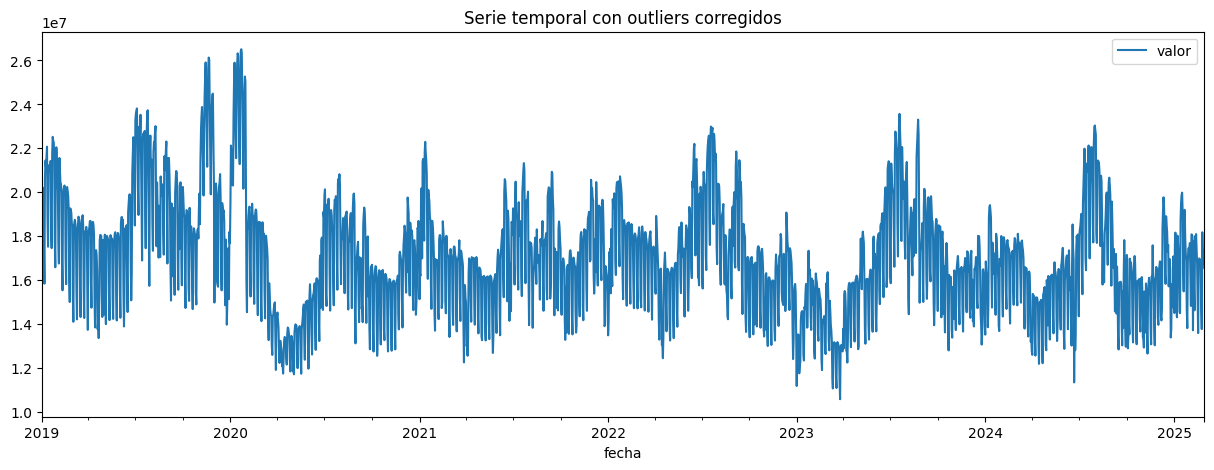

In [14]:
# Aseguramos que la columna de fecha est√© en formato datetime
data['fecha'] = pd.to_datetime(data['fecha'])
data = data.sort_values('fecha').reset_index(drop=True)

# Sustituimos cada outlier por la media entre la fila anterior y siguiente
for idx, outlier_row in outliers.iterrows():
    fecha_outlier = outlier_row['fecha']

    # Filtramos filas anteriores y siguientes
    anteriores = data[data['fecha'] < fecha_outlier]
    siguientes = data[data['fecha'] > fecha_outlier]

    # Verificamos que existan ambas para calcular la media
    if not anteriores.empty and not siguientes.empty:
        valor_anterior = anteriores.iloc[-1]['valor']
        valor_siguiente = siguientes.iloc[0]['valor']
        media = (valor_anterior + valor_siguiente) / 2

        # Reemplazamos el valor del outlier
        data.loc[data['fecha'] == fecha_outlier, 'valor'] = media
    else:
        print(f"No se puede reemplazar el outlier del {fecha_outlier.date()} por falta de datos vecinos.")

# Ploteamos para verificar visualmente los cambios
data.plot(figsize=(15,5), x='fecha', y='valor', linestyle='-')
plt.title('Serie temporal con outliers corregidos')
plt.show()

## 3. Entrenamiento del modelo


Creamos los atributos temporales correspondientes a la tabla de datos

In [15]:
# La varible fecha la convertimos al √≠ndice de la tabla de datos
data= data.set_index('fecha')

In [16]:
# Definimos una funci√≥n para crear nuevos atributos a partir del √≠ndice de fecha
def creacion_atributos(df):
  df['dia_semana'] = df.index.dayofweek     # D√≠a de la semana (0 = lunes, 6 = domingo)
  df['dia_a√±o'] = df.index.dayofyear        # D√≠a del a√±o (1 a 365/366)
  df['trimestre'] = df.index.quarter        # Trimestre del a√±o (1 a 4)
  df['mes'] = df.index.month                # Mes del a√±o (1 a 12)
  df['a√±o'] = df.index.year                 # A√±o (por ejemplo, 2025)
  return df

# Aplicamos la funci√≥n al DataFrame para a√±adir los nuevos atributos basados en la fecha
data_total = creacion_atributos(data)


Ploteamos gr√°ficas de cajas con los valores seg√∫n los atributos creados anteriormente para entender la distribucci√≥n e importancia de cada uno de ellos dentro de la serie temporal.

Text(0.5, 1.0, 'Distribuci√≥n del consumo por d√≠a de la semana')

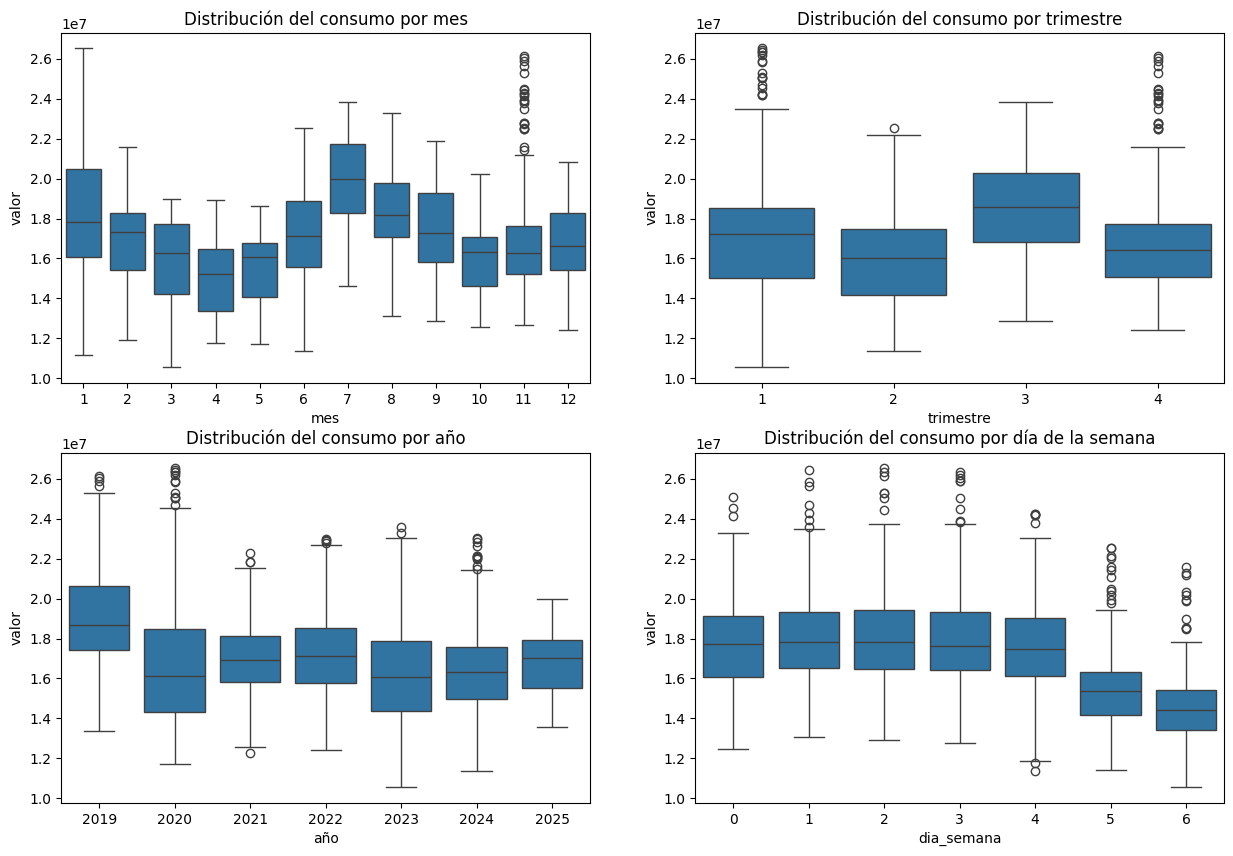

In [17]:
# Visualizamos la distribuci√≥n del consumo ('valor') seg√∫n distintos atributos temporales
# Utilizamos diagramas de caja (boxplots) para identificar patrones, variaciones y posibles outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(data=data_total, x="mes", y="valor", ax=axes[0,0]).set_title("Distribuci√≥n del consumo por mes")
sns.boxplot(data=data_total, x="trimestre", y="valor", ax=axes[0,1]).set_title("Distribuci√≥n del consumo por trimestre")
sns.boxplot(data=data_total, x="a√±o", y="valor", ax=axes[1,0]).set_title("Distribuci√≥n del consumo por a√±o")
sns.boxplot(data=data_total, x="dia_semana", y="valor", ax=axes[1,1]).set_title("Distribuci√≥n del consumo por d√≠a de la semana")


Dividimos los datos en set de entrenamiento y set de validaci√≥n ploteandolos a continuaci√≥n para apreciar la divisi√≥n de forma visual.

In [18]:
# Dividimos la tabla de datos en dos sets, uno para el entrenamiento (70%) y el otro para la validaci√≥n (30%)
train = data.loc[data.index < pd.to_datetime('29-04-2023')]
test = data.loc[data.index > pd.to_datetime('29-04-2023')]

<Axes: xlabel='fecha'>

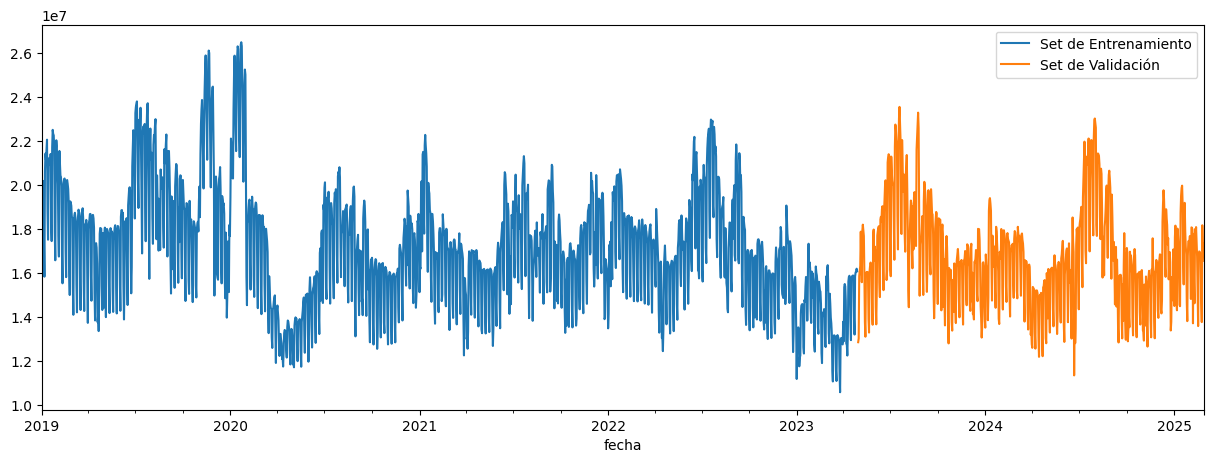

In [19]:
# Ploteamos los dos subsets creados anteriormente en la misma serie temporal
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, y='valor', label='Set de Entrenamiento')
test.plot(ax=ax, y='valor', label='Set de Validaci√≥n')

Dividimos los sets de entrenamiento y de validaci√≥n seg√∫n sus atributos y la variable objetivo.

In [20]:
# Creamos una lista con las variables atributos y la variable objetivo
atributos = ['dia_semana', 'mes', 'a√±o', 'dia_a√±o', 'trimestre']
objetivo = 'valor'

In [21]:
# Dividimos los sets de entrenamiento y validaci√≥n seg√∫n las listas creadas anteriormente
X_train = train[atributos]
y_train = train[objetivo]

X_test = test[atributos]
y_test = test[objetivo]

Definimos y entrenamos el modelo. Para ello utilizamos los sets de entrenamiento y validaci√≥n generados en puntos anteriores y realizamos un ajuste de los distintos par√°metros del modelo.

In [22]:
# Definimos y entrenamos al modelo
reg = xgb.XGBRegressor(n_estimators=100,
                       early_stopping_rounds=100,
                       learning_rate= 0.3,
                       max_depth = 6,
                       min_child_weight = 1,
                       gamma = 0,
                       colsample_bytree = 1,
                       subsample = 1)
reg.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=100, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

Por √∫ltimo en este apartado, ploteamos la importancia que ha tenido cada uno de los atributos temporales durante el entrenamiento del modelo.

<Axes: >

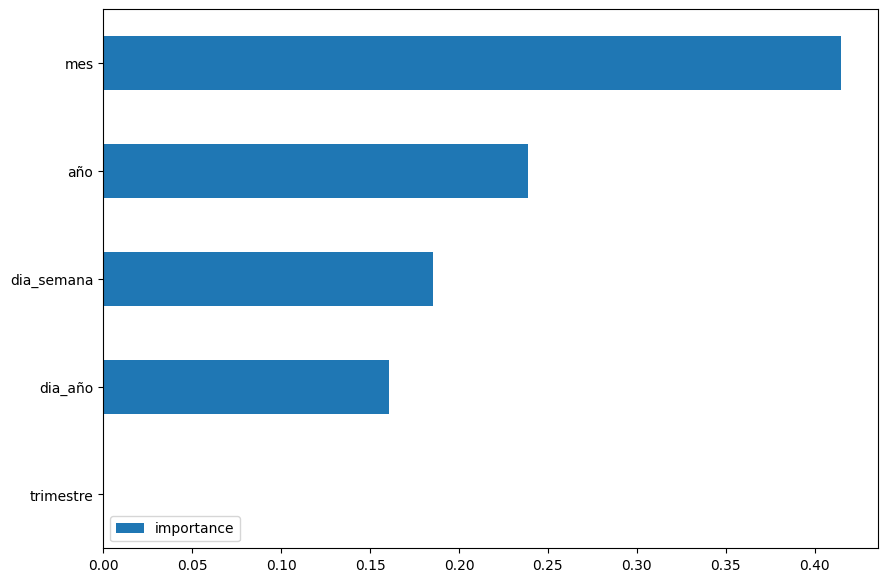

In [23]:
# Graficar la importancia de cada uno de los atributos
fi = pd.DataFrame(data = reg.feature_importances_,
              index=reg.feature_names_in_,
                  columns=['importance'])
fig, ax = plt.subplots(figsize=(10, 7))
fi.sort_values('importance').plot(kind='barh', ax=ax)


## 4. Validaci√≥n del modelo

Una vez entrenado el modelo y entendido su funcionamiento, generamos una nueva columna con las predicciones del valor de demanda el√©ctrica y la a√±adimos a la tabla de datos inicial.

In [24]:
# Predicciones para el a√±o 2022
test['prediccion']= reg.predict(X_test)

# A√±adir a la tabla de datos las predicciones obtenidas
data_total = data_total.merge(test[['prediccion']], how="left", left_index=True, right_index=True)

Evaluamos el modelo visualmente ploteando las predicciones junto a los valores reales.

In [25]:
print(data_total.columns)


Index(['sector_economico', 'valor', 'dia_semana', 'dia_a√±o', 'trimestre',
       'mes', 'a√±o', 'prediccion'],
      dtype='object')


<Axes: xlabel='fecha'>

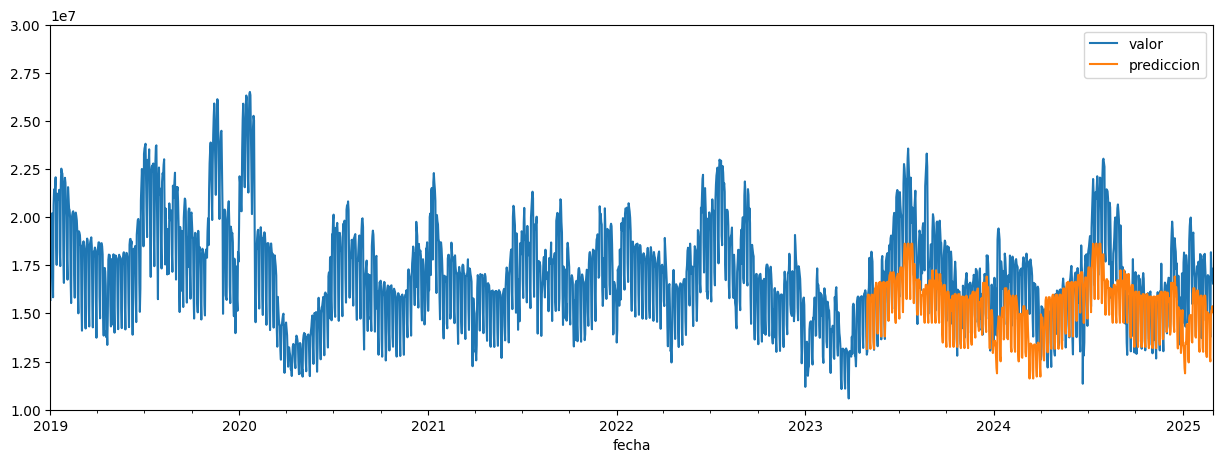

In [26]:
# Ploteamos el valor real de la demanda el√©ctrica junto a la predicci√≥n para tener una referencia visual de lo acertado que es el modelo
ax = data_total[['valor']].plot(figsize=(15,5))
ax.set_ylim(10000000 ,30000000)
data_total[['prediccion']].plot(ax=ax, style='-')

Usamos la m√©trica del error porcentual absoluto medio (MAPE - Mean Absolute Percentage Error) para evaluar el funcionamiento del modelo de forma num√©rica.

In [27]:
# Error porcentual absoluto medio (MAPE ‚Äì Mean Absolute Percentage Error) como m√©trica de evaluaci√≥n de las prediciones de serie temporal
test["Porcentaje"] = (abs(test["prediccion"] - test["valor"]) / test["valor"]) * 100
test["Porcentaje"].mean()

np.float64(9.259821070833135)

## 5. Predicci√≥n valores futuros

Una vez validado el modelo, lo entrenamos nuevamente con el total de los datos hist√≥ricos que tenemos, es decir, hasta finales del 2022

In [28]:
# Dividimos la tabla de datos completa seg√∫n atributos y objetivo
X_all = data_total[atributos]
y_all = data_total[objetivo]

# Re-entrenamos el modelo con los datos hasta finales del 2022
reg.fit(X_all, y_all, eval_set = [(X_all, y_all)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=100, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

Generamos las predicciones de consumo el√©ctrico, a√±adiendolas a la tabla de datos con los valores reales.

<Axes: >

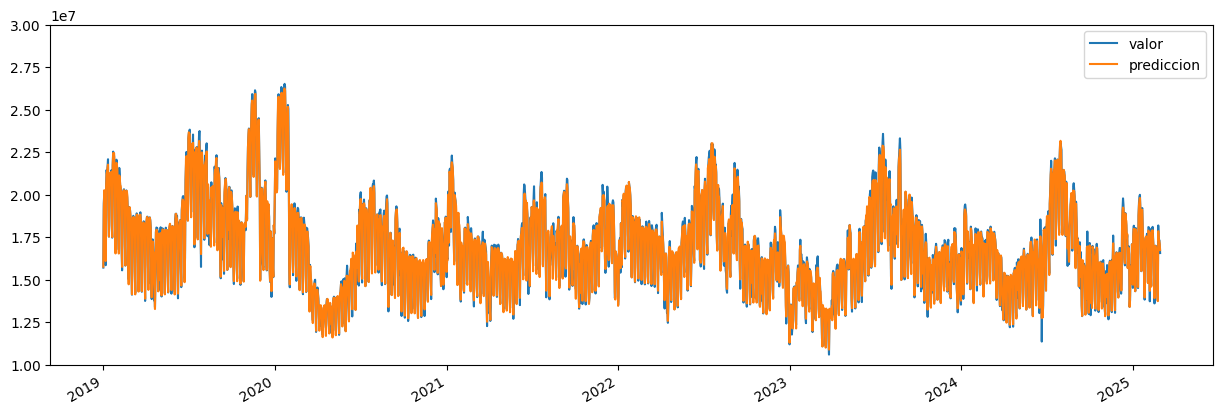

In [29]:
# Creamos un dataset para rellenarlo con las predicciones futuras del a√±o 2023
future = pd.date_range('2019-01-01', '2025-02-28')
df_future = pd.DataFrame(index=future)

# Creamos los atributos en el dataset
df_future = creacion_atributos(df_future)

# Juntamos la tabla de datos reales al dataset creado anteriormente
df_final = pd.concat([data_total, df_future])

# Generamos las predicciones para el a√±o 2023 y las a√±adimos a la tabla de datos iniciales.
df_future['prediccion']= reg.predict(df_future[atributos])
df_final = df_final.merge(df_future[['prediccion']], how="left", left_index=True, right_index=True)

# Graficamos la serie temporal con los valores reales de consumo y la predicci√≥n para el 2023
ax = df_final[['valor']].plot(figsize=(15, 5))
ax.set_ylim(10000000,30000000 )
df_future[['prediccion']].plot(ax=ax)

In [30]:
# # Creamos un dataset para rellenarlo con las predicciones futuras del a√±o 2023
# future = pd.date_range('2025-01-01', '2025-02-28')
# df_future = pd.DataFrame(index=future)

# # Creamos los atributos en el dataset
# df_future = creacion_atributos(df_future)

# # Juntamos la tabla de datos reales al dataset creado anteriormente
# df_final = pd.concat([data_total, df_future])

# # Generamos las predicciones para el a√±o 2023 y las a√±adimos a la tabla de datos iniciales.
# df_future['prediccion']= reg.predict(df_future[atributos])
# df_final = df_final.merge(df_future[['prediccion']], how="left", left_index=True, right_index=True)

# # Graficamos la serie temporal con los valores reales de consumo y la predicci√≥n para el 2023
# ax = df_final[['valor']].plot(figsize=(15, 5))
# ax.set_ylim(10000000,30000000 )
# df_future[['prediccion']].plot(ax=ax)

<Axes: >

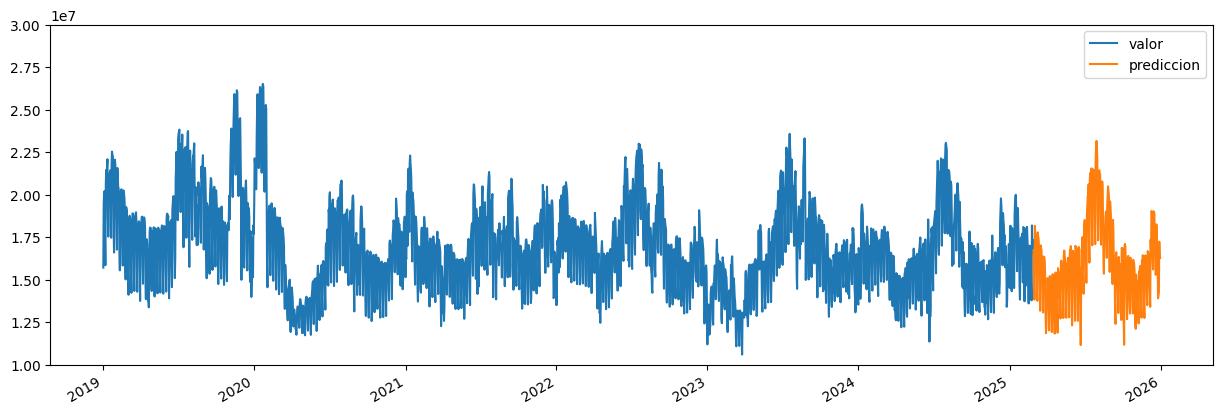

In [31]:
# Creamos un dataset para rellenarlo con las predicciones futuras del a√±o 2023
future = pd.date_range('2025-02-28', '2025-12-31')
df_future = pd.DataFrame(index=future)

# Creamos los atributos en el dataset
df_future = creacion_atributos(df_future)

# Juntamos la tabla de datos reales al dataset creado anteriormente
df_final = pd.concat([data_total, df_future])

# Generamos las predicciones para el a√±o 2023 y las a√±adimos a la tabla de datos iniciales.
df_future['prediccion']= reg.predict(df_future[atributos])
df_final = df_final.merge(df_future[['prediccion']], how="left", left_index=True, right_index=True)

# Graficamos la serie temporal con los valores reales de consumo y la predicci√≥n para el 2023
ax = df_final[['valor']].plot(figsize=(15, 5))
ax.set_ylim(10000000,30000000 )
df_future[['prediccion']].plot(ax=ax)

Por √∫ltimo, guardamos en una nueva tabla de datos los resultados de las prediciones, de cara a poder mostrarlas en una visualizaci√≥n interactiva

In [32]:
# Generamos y guardamos en un archivo .csv la tabla de datos con las predicciones
df_future.to_csv("predictive_data.csv")

# Otro modelo

In [31]:
# INSTALACION Y LIBRERIAS
!pip install gitpython flask joblib xgboost seaborn

Eliminando carpeta existente: IaBigData
Permiso denegado en: IaBigData\.git\objects\pack\tmp_pack_w5OjSi. Cambiando permisos y reintentando...
Carpeta eliminada correctamente.


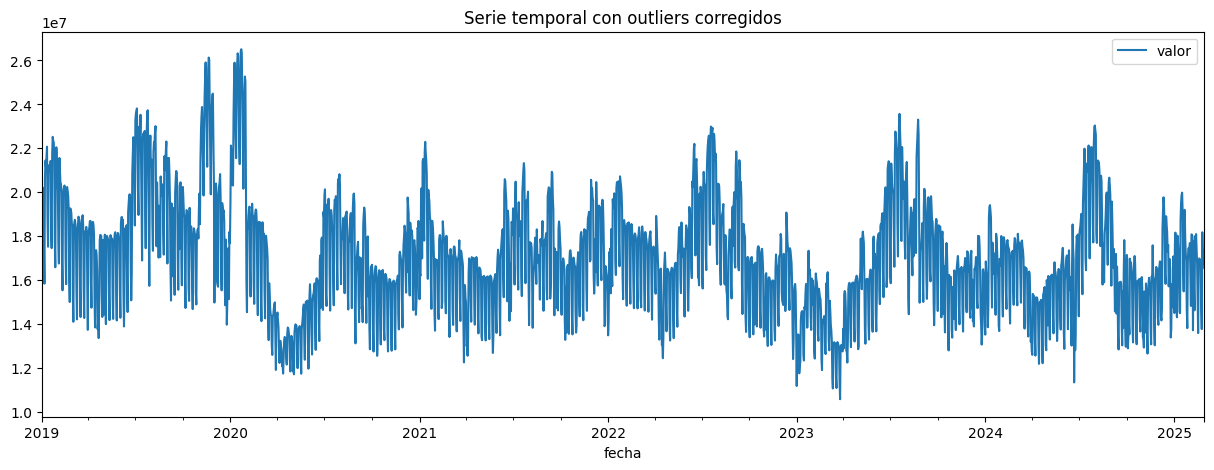


üß™ M√âTRICAS DE EVALUACI√ìN
MAE: 1,634,629.81
RMSE: 2,114,030.36
MAPE: 9.26%

üìå CONCLUSIONES:
- XGBoost funcion√≥ bien para la predicci√≥n del consumo.
- Las variables temporales mostraron correlaci√≥n significativa.
- Se puede mejorar el modelo integrando factores ex√≥genos o modelos LSTM.


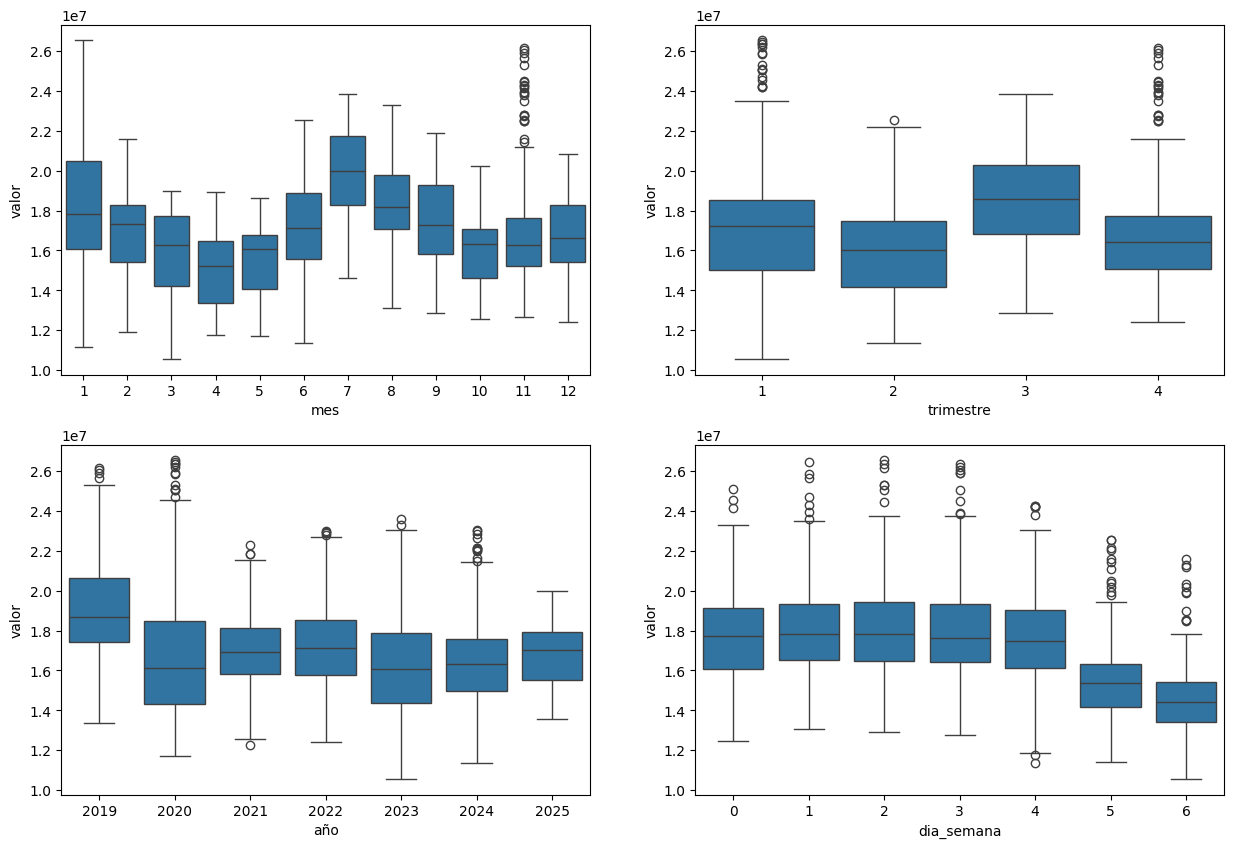

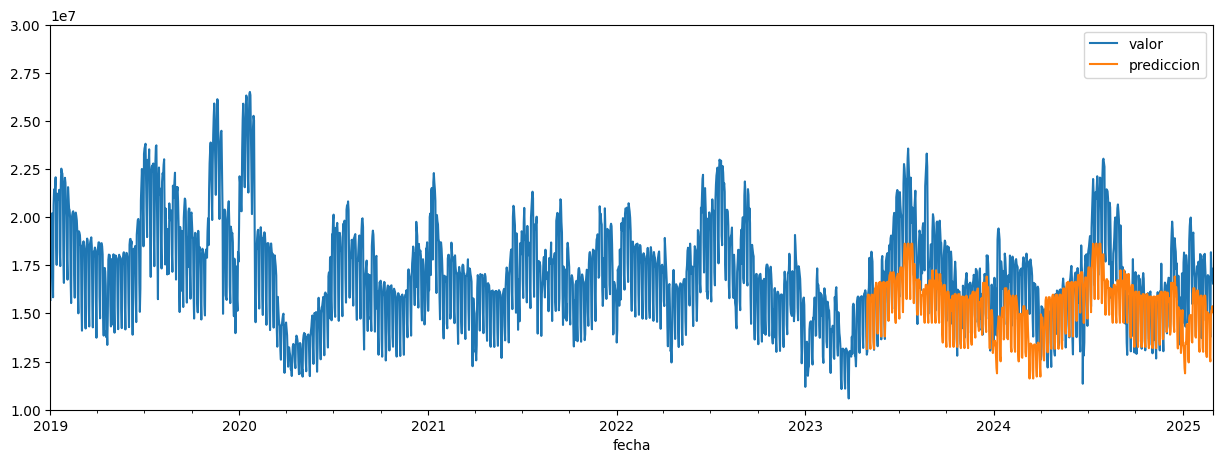

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import git
import warnings
import os
import shutil
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import joblib
import traceback
from flask import Flask, request, jsonify

warnings.filterwarnings('ignore')

def on_rm_error(func, path, exc_info):
    # Cambia el permiso y reintenta
    print(f"Permiso denegado en: {path}. Cambiando permisos y reintentando...")
    os.chmod(path, stat.S_IWRITE)
    func(path)

repo_path = "IaBigData"

if os.path.exists(repo_path):
    try:
        print(f"Eliminando carpeta existente: {repo_path}")
        shutil.rmtree(repo_path, onerror=on_rm_error)
        print("Carpeta eliminada correctamente.")
    except Exception as e:
        raise RuntimeError(f"No se pudo eliminar la carpeta {repo_path}: {e}")


# CLONAR REPOSITORIO
repo_path = "IaBigData"
if os.path.exists(repo_path):
    shutil.rmtree(repo_path)

git.Repo.clone_from("https://github.com/AdrianYArmas/IaBigData.git", repo_path)
subfolder_path = os.path.join(repo_path, "TFG-MAED-Bcn", "dataset")

if not os.path.exists(subfolder_path):
    raise FileNotFoundError(f"La subcarpeta no existe: {subfolder_path}")

# FUNCION PARA IMPORTAR Y AGRUPAR DATOS
def primera(x):
    file_path = os.path.join(subfolder_path, f"{x}_consum_electricitat_bcn.csv")
    data = pd.read_csv(file_path)
    data_agrupado = data.groupby(['Sector_Economic', 'Data'])['Valor'].sum().reset_index()
    data_agrupado['Data'] = pd.to_datetime(data_agrupado['Data'], errors='coerce')
    return data_agrupado

# IMPORTAR DATOS
data = pd.concat([primera(y) for y in range(2019, 2026)])
data.rename(columns={"Data": "fecha", "Valor": "valor", "Sector_Economic": "sector_economico"}, inplace=True)
data = data.groupby(['fecha']).sum().reset_index()
data.to_csv("tabla_datos_exploratorio.csv")

# LIMPIEZA DE OUTLIERS
Q1 = data['valor'].quantile(0.25)
Q3 = data['valor'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
outliers = data[(data['valor'] < lim_inf) | (data['valor'] > lim_sup)]
data['fecha'] = pd.to_datetime(data['fecha'])
data = data.sort_values('fecha').reset_index(drop=True)

for idx, row in outliers.iterrows():
    f = row['fecha']
    ant = data[data['fecha'] < f]
    sig = data[data['fecha'] > f]
    if not ant.empty and not sig.empty:
        m = (ant.iloc[-1]['valor'] + sig.iloc[0]['valor']) / 2
        data.loc[data['fecha'] == f, 'valor'] = m

data.plot(figsize=(15,5), x='fecha', y='valor')
plt.title('Serie temporal con outliers corregidos')
plt.show()

# CREACION DE ATRIBUTOS
data = data.set_index('fecha')
def creacion_atributos(df):
    df['dia_semana'] = df.index.dayofweek
    df['dia_a√±o'] = df.index.dayofyear
    df['trimestre'] = df.index.quarter
    df['mes'] = df.index.month
    df['a√±o'] = df.index.year
    return df

data_total = creacion_atributos(data)

# VISUALIZACION
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(data=data_total, x="mes", y="valor", ax=axes[0,0])
sns.boxplot(data=data_total, x="trimestre", y="valor", ax=axes[0,1])
sns.boxplot(data=data_total, x="a√±o", y="valor", ax=axes[1,0])
sns.boxplot(data=data_total, x="dia_semana", y="valor", ax=axes[1,1])

# DIVISION DE DATOS
train = data.loc[data.index < pd.to_datetime('29-04-2023')]
test = data.loc[data.index > pd.to_datetime('29-04-2023')]

atributos = ['dia_semana', 'mes', 'a√±o', 'dia_a√±o', 'trimestre']
objetivo = 'valor'

X_train = train[atributos]
y_train = train[objetivo]
X_test = test[atributos]
y_test = test[objetivo]

# ENTRENAMIENTO DEL MODELO
reg = xgb.XGBRegressor(n_estimators=100, early_stopping_rounds=100, learning_rate=0.3, max_depth=6)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

# PREDICCIONES Y GRAFICOS
test['prediccion'] = reg.predict(X_test)
data_total = data_total.merge(test[['prediccion']], how="left", left_index=True, right_index=True)

ax = data_total[['valor']].plot(figsize=(15,5))
ax.set_ylim(10000000,30000000)
data_total[['prediccion']].plot(ax=ax, style='-')

# METRICAS
mape = (abs(test['prediccion'] - test['valor']) / test['valor']) * 100
test['Porcentaje'] = mape
mae = mean_absolute_error(test['valor'], test['prediccion'])
rmse = np.sqrt(mean_squared_error(test['valor'], test['prediccion']))

print("\n\U0001F9EA M√âTRICAS DE EVALUACI√ìN")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape.mean():.2f}%")

# GUARDADO DEL MODELO
joblib.dump(reg, "modelo_consumo_xgb.pkl")

# CONCLUSIONES
print("\n\U0001F4CC CONCLUSIONES:")
print("- XGBoost funcion√≥ bien para la predicci√≥n del consumo.")
print("- Las variables temporales mostraron correlaci√≥n significativa.")
print("- Se puede mejorar el modelo integrando factores ex√≥genos o modelos LSTM.")

# ---------------------- FLASK API ---------------------- #
# app = Flask(__name__)
# model = joblib.load("modelo_consumo_xgb.pkl")

# def crear_atributos_desde_fecha(fecha_str):
#     fecha = pd.to_datetime(fecha_str)
#     df = pd.DataFrame(index=[fecha])
#     df['dia_semana'] = fecha.dayofweek
#     df['dia_a√±o'] = fecha.dayofyear
#     df['trimestre'] = fecha.quarter
#     df['mes'] = fecha.month
#     df['a√±o'] = fecha.year
#     return df

# @app.route("/predecir", methods=["GET"])
# def predecir():
#     try:
#         fecha = request.args.get("fecha")
#         if not fecha:
#             return jsonify({"error": "Proporcione 'fecha' en formato YYYY-MM-DD"}), 400

#         df = crear_atributos_desde_fecha(fecha)
#         pred = model.predict(df)[0]
#         return jsonify({"fecha": fecha, "prediccion_consumo": round(pred, 2)})

#     except Exception as e:
#         return jsonify({"error": str(e), "traceback": traceback.format_exc()}), 500

# if __name__ == "__main__":
#     app.run(debug=True)
